# <font color= black ><center>Travel Insurance claim prediction using Decison Tree & Random Forest.</center></color>

# Description

 The data provides a information about third-party travel insurance servicing company that is based in Singapore. Objective of exercise is to investigate different varaible which is responsible for cliam. and to create Decision Tree & Random Forest model to predict the claim status. This dataset has been taken from kaggle.
 
 **Dataset url : https://www.kaggle.com/mhdzahier/travel-insurance**

**Data Dictionary**

1)Target: Claim Status (Claim.Status)  

2)Name of agency (Agency)  

3)Type of travel insurance agencies (Agency.Type)  

4)Distribution channel of travel insurance agencies (Distribution.Channel)  

5)Name of the travel insurance products (Product.Name)  

6)Duration of travel (Duration)  

7)Destination of travel (Destination)  

8)Amount of sales of travel insurance policies (Net.Sales)  

9)Commission received for travel insurance agency (Commission)  

10)Gender of insured (Gender)  

11)Age of insured (Age)

### Import necesscary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('travel insurance.csv')

### Sample of the dataset

In [3]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
data.shape

(63326, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [6]:
data.duplicated().sum()

8042

In [7]:
data.Claim.value_counts(normalize=True)

No     0.985361
Yes    0.014639
Name: Claim, dtype: float64

In [8]:
data=data.drop('Gender',axis=1)

* There are total 63326 rows and 11 columns in the dataset.  
* 7 object datatype variable,2 integer datatype variable and 2float datatype variable are exist. 
* From the above results we can see that there is huge number of missing value present in the variable "Gender".As nearly 70% of value is missed. So better we can remove this variable.
* Also checked that there is 8042 duplicate rows.But there is no unique identifier. It may be a chance that similar tour packages choosen by different people having same age.So it kept duplicated data.
* After removing the feature "Gender", 10 columns in the dataset.

# EDA

 **Statiscal Summary**

In [9]:
data.describe(include='all')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
count,63326,63326,63326,63326,63326,63326.000000,63326,63326.000000,63326.000000,63326.000000
unique,16,2,2,26,2,NaN,149,NaN,NaN,NaN
top,EPX,Travel Agency,Online,Cancellation Plan,No,NaN,SINGAPORE,NaN,NaN,NaN
freq,35119,45869,62219,18630,62399,NaN,13255,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.317074,NaN,40.702018,9.809992,39.969981
std,NaN,NaN,NaN,NaN,NaN,101.791566,NaN,48.845637,19.804388,14.017010
min,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,35.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.530000,0.000000,36.000000
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,43.000000


**From the above table, we can observe that**
* The age of passengers varies from 0 to 118 and average age is ~40.  
* The commision for tour insurance firm is varies from 0 to 283.5 and the average commision is 14.5.  
* Duration have neagtive value,it seems that there is bad value need to impute.  
* The Net Sales of tour insurance varies from -389 to 810 and the average sales in 40.7. Net sales has neagtive value, semes that it may be a anomalies. Need to confirm those values.
* The variable Agency has 16 unique valuesamong them EPX is most frequent one and there 2 type of insurance firm, among them Travel agency have higher frequency.
* Among two channel,through online most of the insurance has been distributed.  
* There are 26 different products are available in the Product Name variable.Among them Cancellation plan is widely choosen.  
* Destination has 149 unique values and SINGAPORE is the one which choosen most.  
* Variable Claimed is a target variable, which has more number of value as 'NO', nearly 98.5%. Seem data is imbalanced with respect to target variable.

**Impute Bad values and anomalies.**

In [10]:
data[data['Net Sales']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
57991,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,6,AUSTRALIA,-9.9,5.94,31
57992,RAB,Airlines,Online,Value Plan,No,9,BRUNEI DARUSSALAM,-15.0,6.00,46
57993,C2B,Airlines,Online,Annual Silver Plan,No,386,SINGAPORE,-161.0,40.25,28
57994,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,28,MALAYSIA,-29.7,17.82,31


* we can see that many observation have Net sales as negative value. It may be due to any offers in tour package. It depends on the business context. So i will keep this row as it is.

In [11]:
data[data.Duration<0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
14943,JZI,Airlines,Online,Basic Plan,No,-2,BANGLADESH,22.0,7.7,118
52587,JZI,Airlines,Online,Basic Plan,No,-1,MALAYSIA,18.0,6.3,118
52588,JZI,Airlines,Online,Basic Plan,No,-1,BRUNEI DARUSSALAM,18.0,6.3,118
56668,JZI,Airlines,Online,Basic Plan,No,-1,INDONESIA,18.0,6.3,118
59528,JZI,Airlines,Online,Basic Plan,No,-1,CHINA,22.0,7.7,118


* The above record have bad value in duration variable. As it is only one record in 63000, removing them doesnt affect our model.So i dropped this row from my dataset.

**It seems dataset have no Missing values now and also we treated bad values. So we can proceed with a Data Visualization. i.e Univariate and Multivariate Analysis and Data Preparation.**

## Data Visualization

### Univariate Analysis

In [12]:
data_cat=data.drop(['Age','Commision (in value)','Duration','Net Sales'],axis=1)
data_num=data.drop(['Agency', 'Agency Type', 'Claim', 'Distribution Channel', 'Product Name','Destination'],axis=1)

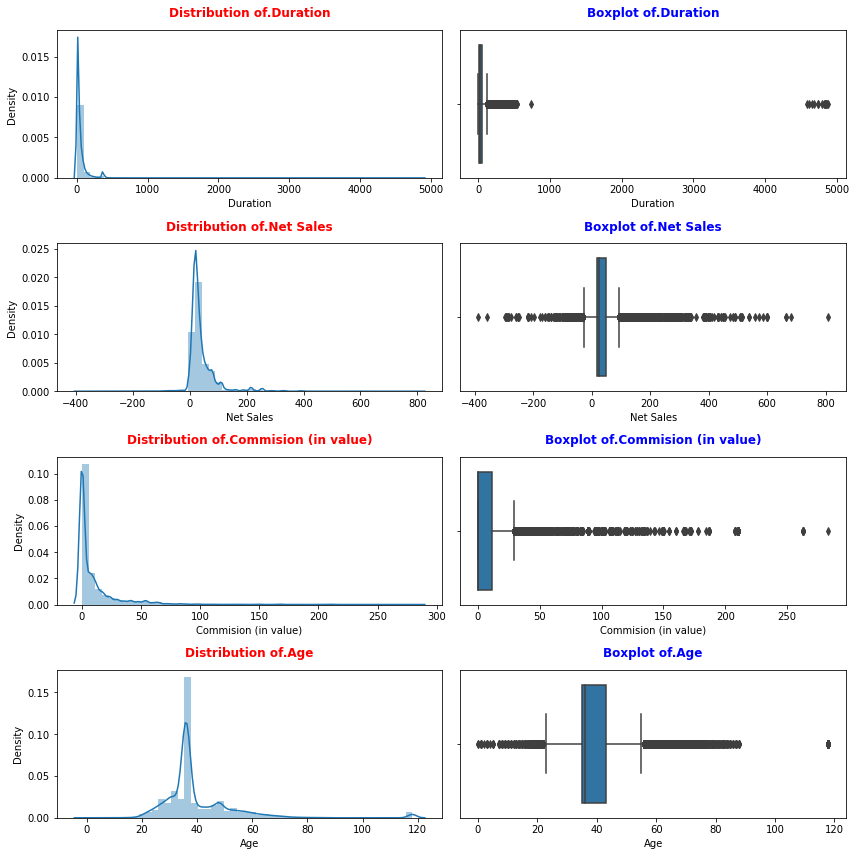

In [13]:
plt.figure(figsize=(12,12))
for i in range(len(data_num.columns)):
    plt.subplot(4,2,(2*i)+1)
    sns.distplot(data_num[data_num.columns[i]])
    plt.title('Distribution of.{}'.format(data_num.columns[i]),weight='bold',color='red',y=1.05)
    plt.subplot(4,2,(2*i)+2)
    sns.boxplot(data_num[data_num.columns[i]])
    plt.title('Boxplot of.{}'.format(data_num.columns[i]),weight='bold',color='Blue',y=1.05)
    plt.tight_layout()

In [14]:
for i in range(len(data_num.columns)):
    print ('Skew of',data_num.columns[i],  '= ',round(data_num[data_num.columns[i]].skew(),2))

Skew of Duration =  23.18
Skew of Net Sales =  3.27
Skew of Commision (in value) =  4.03
Skew of Age =  2.99


**From the above graph,we can observe the following informations** 
* The variable Age is highly right skewed and have many outliers on both higher side & lower side.
* The variable Commision is highly right skewed and have many outliers on higher side 
* The variable Duration is highly right skewed and have many outliers on higher side.
* The variable Net Sales is highly right skewed and have many outliers on both higher side & lower side.

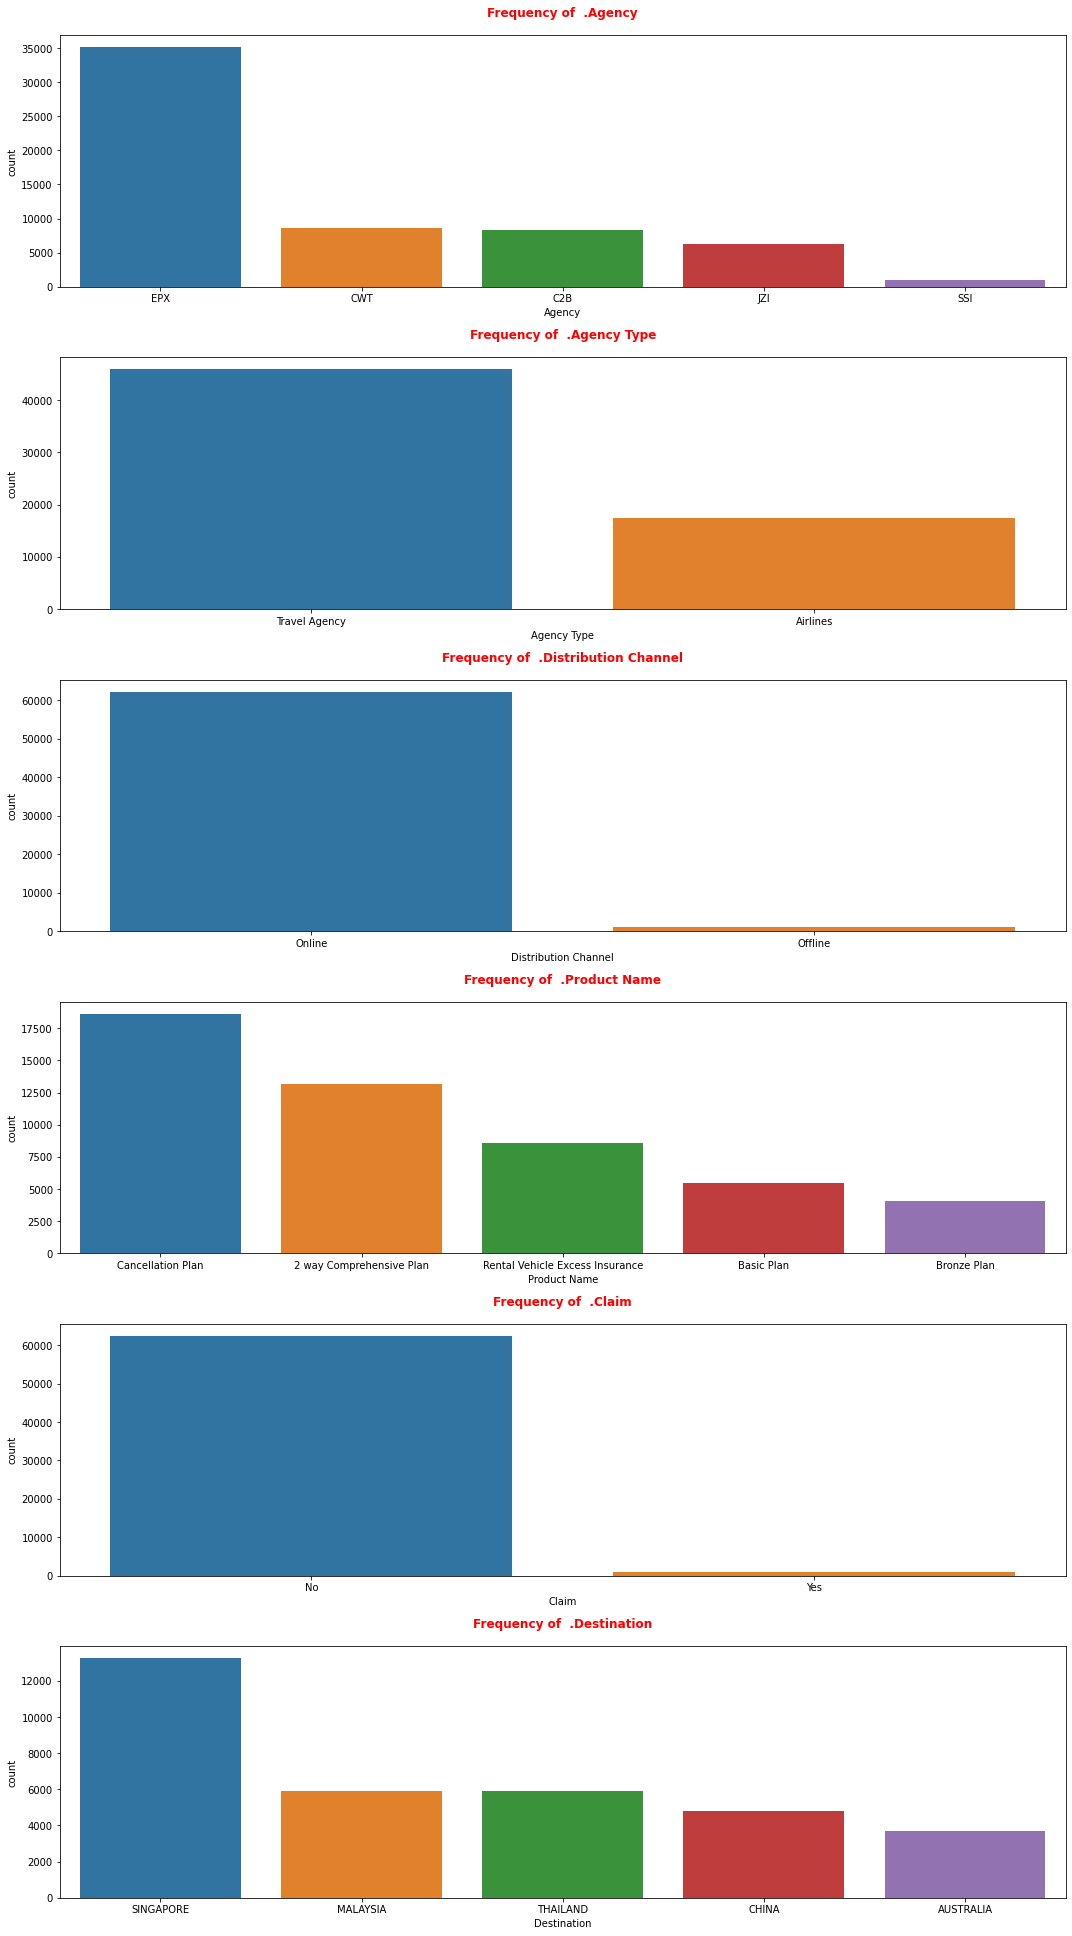

In [15]:
plt.figure(figsize=(15,27))
for i in range(len(data_cat.columns)):
    plt.subplot(6,1,i+1)
    sns.countplot(data_cat[data_cat.columns[i]],order=data_cat[data_cat.columns[i]].value_counts().iloc[:5].index)
    plt.title('Frequency of  .{}'.format(data_cat.columns[i]),weight='bold',color='red',y=1.05)
    plt.tight_layout()

**From the above graph,we can observe that** 
* Plot shows the top 5 agency.The maximun number tours organised by the Agent"EPX". 
* The maximum type of tour insurance firm is "Travel agency".  
* The claimed status for maximum number of tours is "NO".  
* The most number of tour insurance are distributed through "online" channel.  
* Widely choosen product is "Cancellation plan".
* "SINGAPORE" is the destination visited by most of the customer who bought insurance and follows by MALASIYA and THAILAND.

**Bivariate Anlysis**

<function matplotlib.pyplot.show(close=None, block=None)>

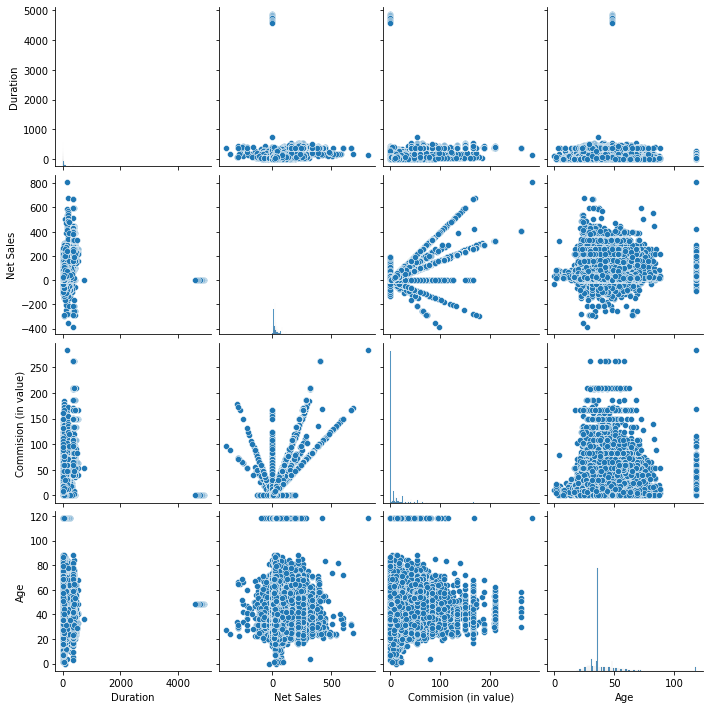

In [16]:
sns.pairplot(data_num)
plt.show

**The above pair plot shows the relationship between the each variable to each other.We can see that there is corelation between Commision & Net Sales and it seems no strong correlation among other variables.The value of correlation has been explained with the aid of heatmap**

**Heatmap**

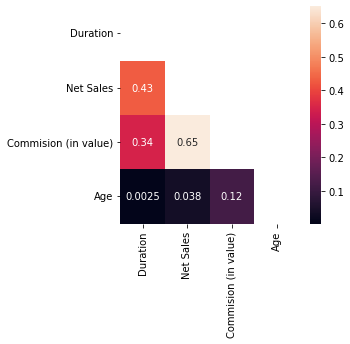

In [17]:
plt.figure(figsize=(4,4))
sns.heatmap(data_num.corr(),annot=True,mask=np.triu(np.ones_like(data_num.corr(),dtype=np.bool)))
plt.show()

**From the above heatmap,we can observe that,**  
* The moderate corelation is exist between Sales & Commision.
* The week corelation is exist between Duration & Commision.  
* The week corelation is exist between Duration & Sales.
* There is no corelation for AGE with any other variables

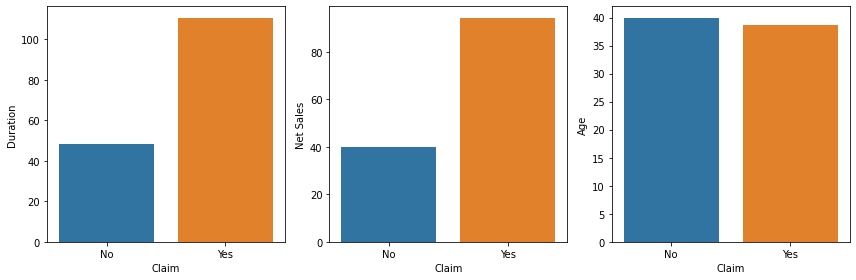

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(y=data.Duration,x=data.Claim,ci=None)
plt.subplot(1,3,2)
sns.barplot(y=data['Net Sales'],x=data.Claim,ci=None)
plt.subplot(1,3,3)
sns.barplot(y=data.Age,x=data.Claim,ci=None)
plt.tight_layout()

<AxesSubplot:xlabel='Destination', ylabel='count'>

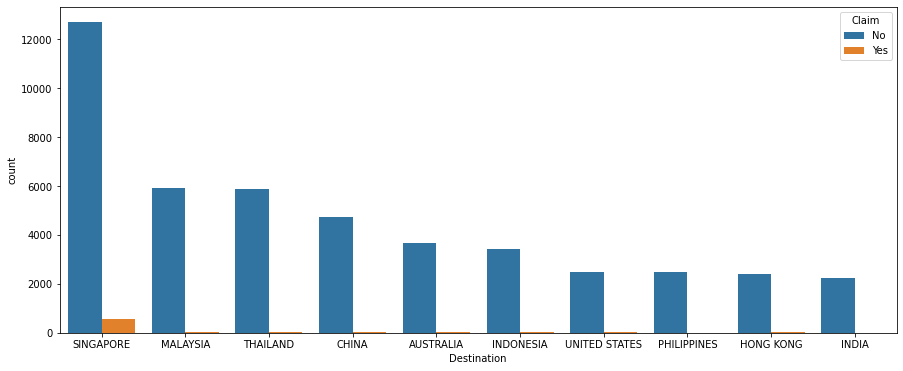

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data_cat['Destination'],order=data_cat['Destination'].value_counts().iloc[:10].index,hue=data_cat.Claim)

**From the above plots we can observe that**
* The more number of claim is made for longer duration than shorter duration.  
* The more number of claim is made for policies which are higher in Sales. 
* Age doesn't make any differnce to made a claim or not.
* The more number of claim is made by persons whose destination is "SINGAPORE".This may be due to most of the tour is arranged for Singapore.